## Optimización de Portafolios
### Sesión 2 (14-06-2021)

Paso a paso de la implementación.

Respecto a los libros recomendados. Paso imágenes y libros específicos.

* [Optimization Methods in Finance](https://www.amazon.com/Optimization-Methods-Finance-Mathematics-Risk/dp/1107056748/ref=sr_1_fkmr3_1?dchild=1&keywords=optimization+methods+raja+tutuncu&qid=1623702061&sr=8-1-fkmr3)
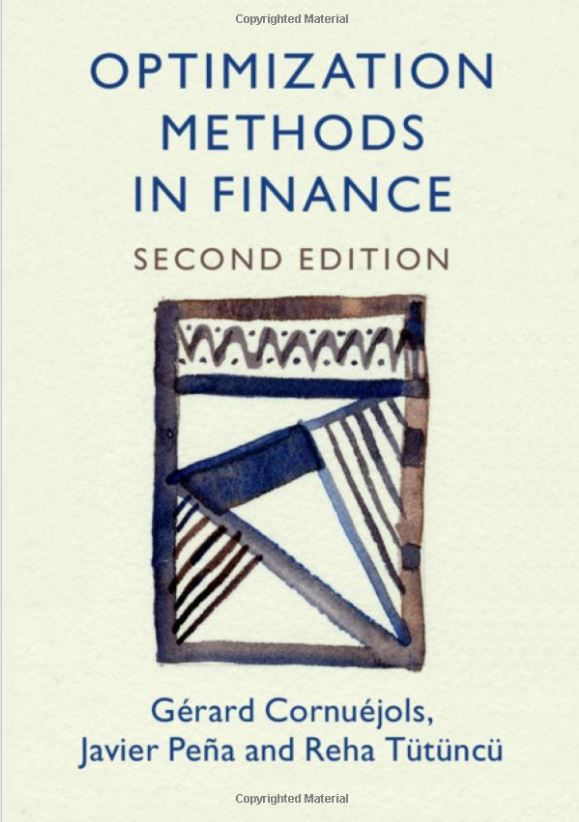

* [Introduction to Operations Research](https://www.amazon.com/Introduction-Operations-Research-Student-Access/dp/0077298349/ref=sr_1_4?crid=3PB1OIGKLBHSU&dchild=1&keywords=introduction+to+operations+research&qid=1623702257&sprefix=introduction+to+operations+research%2Caps%2C286&sr=8-4)
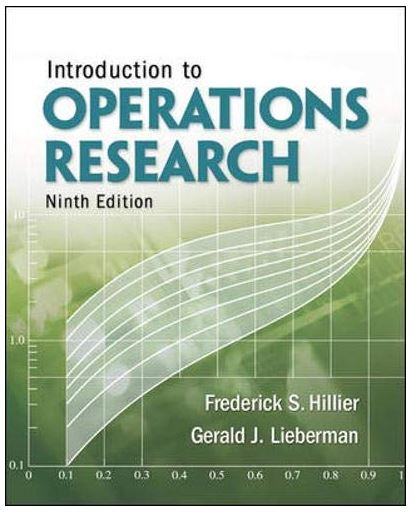

#### Importamos los módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import warnings
plt.style.use('seaborn-colorblind')
warnings.filterwarnings("ignore")

In [2]:
# Fijamos la semilla (random)
np.random.seed(123)

#### Definimos el universo de activos
Sobre el cual estaremos bajando información histórica...
* AMZN: Amazon.com Inc.
* GOOG: Alphabet Inc., Class C Shares
* TSLA: Tesla Inc.
* NFLX: Netflix Inc.
* MELI: MercadoLibre Inc.

Bueno, vamos a hacer una cosa: intento comentar el código de Julian lo más posible. A ver que sale. Va a ser todo en comentario porque lo empecé así y dije "despues lo paso a markdown" pero me dio bocha de fiaca.

In [3]:
## acá define 5 tickers y con pdr.get_data_yahoo los va a buscar a internet. 
## va desde el 2015-01-01 hasta la fecha de hoy: dt.date.today()
## y toma el valor ajustado al cierre ("Adj Close")

tickers = ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI']
prices = pdr.get_data_yahoo(tickers, start = '2015-01-01', end=dt.date.today())['Adj Close']
prices

Symbols,AMZN,GOOG,TSLA,NFLX,MELI
Date,,,,,
2015-01-02,308.519989,523.373108,43.862000,49.848572,124.582504
2015-01-05,302.190002,512.463013,42.018002,47.311428,123.048119
2015-01-06,295.290009,500.585632,42.256001,46.501431,120.850479
2015-01-07,298.420013,499.727997,42.189999,46.742859,120.612877
2015-01-08,300.459991,501.303680,42.124001,47.779999,122.414551
...,...,...,...,...,...
2021-06-11,3346.830078,2513.929932,609.890015,488.769989,1392.750000
2021-06-14,3383.870117,2527.040039,617.690002,499.890015,1432.630005
2021-06-15,3383.129883,2520.659912,599.359985,491.899994,1404.780029


In [4]:
prices.columns

Index(['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI'], dtype='object', name='Symbols')

Text(0.5, 1.0, 'Price evolution for constituents')

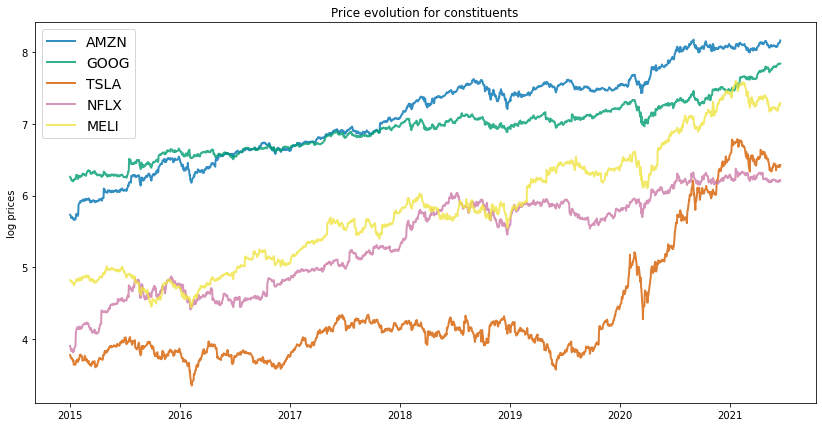

In [5]:
## aca hace un plot de los precios en el tiempo
plt.figure(figsize=(14,7))

## para cada ticker ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI'] itera
for i in prices.columns.values:
    
    ##y plotea el index que es la fecha contra el logaritmo de los precios de ese ticker
    plt.plot(prices.index, np.log(prices[i]), lw = 2, alpha = 0.8, label = i)
    
    ## agrega la leyenda arriba a la izquierda (la cajita con los nombres de los tickers)
    plt.legend(loc = 'upper left', fontsize = 14)
    
plt.ylabel('log prices')
plt.title('Price evolution for constituents')

#### Retornos (diarios y mensuales)
Pasamos a trabajar en términos de retornos...

In [6]:
## acá va a cambiar los precios a los retornos %
## el método pct_change hace basicamente: 
## "(el precio de ahora - el precio de la fila de arriba)/el precio de la fila de arriba "
returns = prices.pct_change()

## asfreq resamplea la serie de tiempo. 
## BM significa "business month end frequency"
## o sea, el precio a fin de mes (hábil)
## con .ffill() si falta un dato lo completa con el último válido
monthly_prices = prices.asfreq(freq='BM').ffill()
monthly_prices

Symbols,AMZN,GOOG,TSLA,NFLX,MELI
Date,,,,,
2015-01-30,354.529999,533.056519,40.720001,63.114285,122.691727
2015-02-27,380.160004,556.871094,40.667999,67.844284,129.650925
2015-03-31,372.100006,546.499573,37.754002,59.527142,121.389015
2015-04-30,421.779999,537.340027,45.209999,79.500000,141.016174
2015-05-29,429.230011,532.109985,50.160000,89.151428,143.790314
...,...,...,...,...,...
2021-01-29,3206.199951,1835.739990,793.530029,532.390015,1779.510010
2021-02-26,3092.929932,2036.859985,675.500000,538.849976,1638.109985
2021-03-31,3094.080078,2068.629883,667.929993,521.659973,1472.140015


Detalles de la función de Pandas *.asfreq*. Para cambiar la frecuencia, según la que elijamos, en nuestro caso 'BM' -Last business day of the month-. Para mas información [ver este link](https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags). Por otro lado, tenemos *.ffill*, que es 'forward fill', rellenando con el valor previo (en caso de *missing values*).

In [7]:
## acá vuelve a calcular retornos, pero esta vez calcula retornos mensuales
## está tomando los precios mensuales que sacó recién y obtiene el retorno % 
monthly_returns = monthly_prices.pct_change()
monthly_returns

Symbols,AMZN,GOOG,TSLA,NFLX,MELI
Date,,,,,
2015-01-30,NaN,NaN,NaN,NaN,NaN
2015-02-27,0.072293,0.044676,-0.001277,0.074943,0.056721
2015-03-31,-0.021202,-0.018625,-0.071653,-0.122592,-0.063724
2015-04-30,0.133512,-0.016760,0.197489,0.335525,0.161688
2015-05-29,0.017663,-0.009733,0.109489,0.121402,0.019672
...,...,...,...,...,...
2021-01-29,-0.015576,0.047869,0.124506,-0.015424,0.062255
2021-02-26,-0.035328,0.109558,-0.148740,0.012134,-0.079460
2021-03-31,0.000372,0.015597,-0.011207,-0.031901,-0.101318


Text(0.5, 1.0, 'Monthly returns for selected assets')

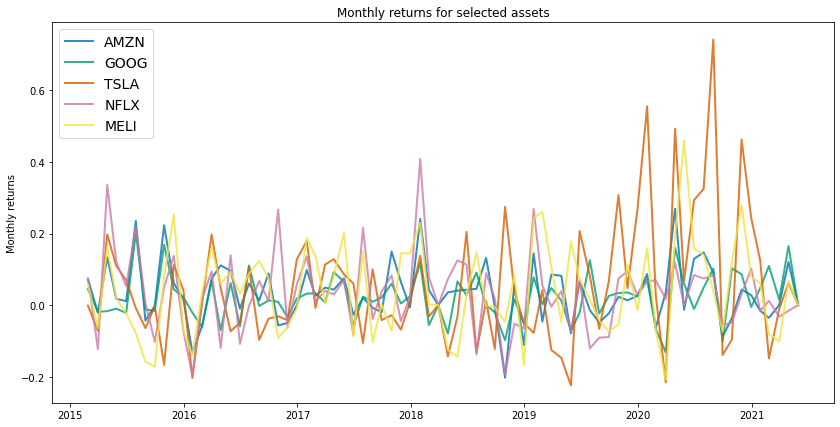

In [8]:
## grafica los retornos, parecido a como hizo con los precios:
plt.figure(figsize=(14,7))

## para cada ticker plotea los retornos
for i in monthly_returns.columns.values:
    plt.plot(monthly_returns.index, monthly_returns[i], lw=2, alpha=0.8, label=i)

## estas son cosas de formato
plt.legend(loc='upper left', fontsize = 14) ## la leyenda
plt.ylabel('Monthly returns') ## el nombre de Y
plt.yticks() 
plt.title('Monthly returns for selected assets') ## titulo

#### Generación de inputs
Vamos a pasar a generar los inputs para nuestro proceso de optimización. Vamos a utilizar (e importar) el módulo pypfopt. La documentación específica puede encontrarse [aquí](https://pyportfolioopt.readthedocs.io/en/latest/).

In [9]:
from pypfopt import expected_returns
from pypfopt import risk_models

Tal y como planteamos en la sesión pasada, calculamos el retorno esperado:
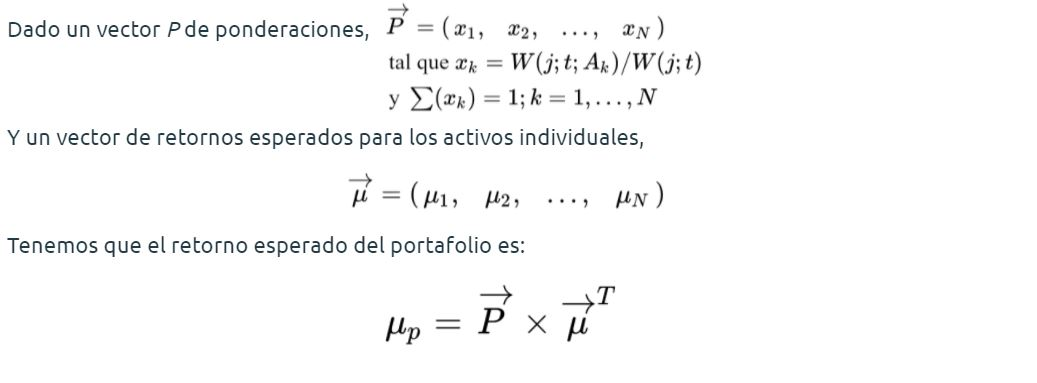

In [10]:
## acá creo que dijo que la había pifiado. Voy a ver la documentación
## volví
## frequency es la cantidad de periodos en un año. Si esto es data mensual, la frequency es 12
## lo que calculamos acá es la media geométrica de los retornos (anualizada). 
## Se calcula a partir del precio.
## podemos pasar de media geométrica a media aritmética con el parámetro "compounding"

## estaba así:
#mu = expected_returns.mean_historical_return(monthly_prices,frequency = 24) 

##lo cambio a: (de paso lo pasamos a media aritmética porque pintó)
mu = expected_returns.mean_historical_return(monthly_prices,frequency = 12, compounding = False) 


mu

Symbols
AMZN    0.404450
GOOG    0.265102
TSLA    0.617937
NFLX    0.401704
MELI    0.497185
dtype: float64

In [11]:
## la documentación viene con el siguiente comentario esperanzador: 

## This is probably the default textbook approach. It is intuitive and easily interpretable, 
## however the estimates are subject to large uncertainty. 
## This is a problem especially in the context of a mean-variance optimizer, 
## which will maximise the erroneous inputs.

y el riesgo (en función de la matriz de covarianzas)
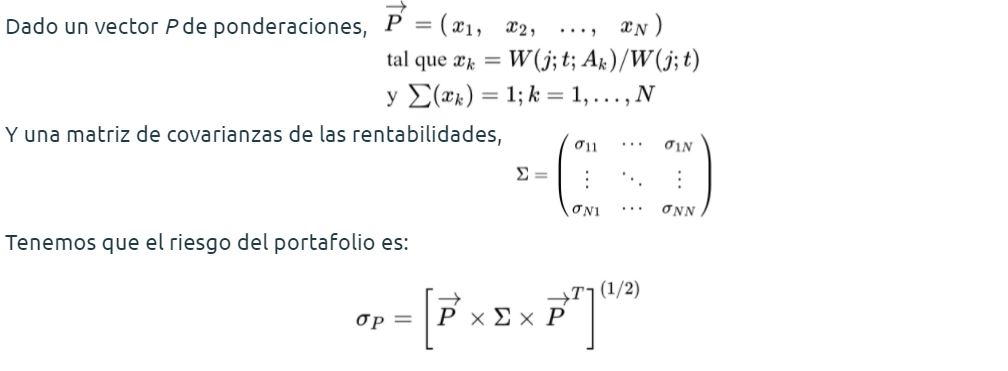

In [12]:
## calcula la matriz de covarianza muestral anualizada.
## lo mismo con frequency que en la anterior
covmat = risk_models.sample_cov(monthly_prices, frequency = 12)
covmat

Symbols,AMZN,GOOG,TSLA,NFLX,MELI
Symbols,,,,,
AMZN,0.082330,0.038825,0.049416,0.063403,0.046360
GOOG,0.038825,0.051145,0.038485,0.027125,0.037422
TSLA,0.049416,0.038485,0.374753,0.051806,0.081514
NFLX,0.063403,0.027125,0.051806,0.142701,0.053475
MELI,0.046360,0.037422,0.081514,0.053475,0.188433


In [13]:
## como en la diagonal de una matriz de covarianza vos tenés las varianzas
## lo que hace acá es tomar la diagonal (np.diag) y calcularle la raiz cuadrada (np.sqrt)
sd = np.sqrt(np.diag(covmat))
sd

array([0.28693179, 0.22615271, 0.61217087, 0.37775783, 0.43408873])

#### Portafolios aleatorios
Vamos a armar distintas funciones para generar portafolios aleatorios. Por un lado una que nos calcule directamente las métricas de los portafolios (que podremos reutilizar luego), así como una función que nos arme una matriz de portafolios (en términos de ubicarlos en el plano *mean-variance*).

In [14]:
def portfolio_metrics(weights, mean_returns, cov_matrix):
    
    ## esta función toma como input los pesos, los retornos y la matriz de covarianza
    ## y te da media y desvío del portfolio
    
    ## los retornos (ret) los calcula como la suma del producto de los retornos promedio y los pesos
    ## o sea, hace un producto punto entre el vector de retornos medios y el vector de pesos
    ret = np.sum(mean_returns * weights) 
    
    ## y para la desviacion estandar: vamos a desarmarlo para que sea más claro
    ## así estaba el original:
    #std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    ## lo desarmo en:
    ## primer producto:
    ## acá lo que hace es premultiplicar los pesos por la matriz de covarianza
    prod1 = np.dot(cov_matrix, weights)
    
    ## segundo producto:
    ## acá toma el producto anterior y los premultiplica por la transpuesta de los pesos
    prod2 = np.dot(weights.T, prod1)
    
    ##entonces hasta acá prod2 es pesos_transpuesto * matriz_covarianza * pesos
    ## y lo termina calculando el desvío estandar
    std = np.sqrt(prod2)
    
    return ret, std


# vector de portafolios aleatorios
## vamos a ver como calcula un portfolio aleatorio:
def random_portfolios(num_port, mean_returns, cov_matrix):
    ## el input es el numero de portfolios que queres calcular, las medias de los retornos 
    ## y la matriz de covarianza
    
    ## primero genera una matriz de 2 filas y tantas columnas como numero de portfolios, todo en 0:
    metrics = np.zeros((2, num_port)) # matriz de dos filas, num_port columnas, toda de ceros
    
    ## ¿Para que hace esto? Para tener donde guardar las medias y los desvios. 
    ## En una fila va a guardar todas las medias
    ## en la otra fila todos los desvíos
    
    ## arma una lista vacía
    weights_matrix = []
    
    ## y acá va a iterar: para cada portfolio va a repetir una serie de pasos.
    for i in range(num_port):
        
        ## primero genera numeros aleatorios. np.random.random samplea uniforme en el intervalo [0.0, 1.0)        
        ## ¿cuantas muestras? len(mean_returns) o sea, samplea un pesos para elemento dentro de 
        ## mean_returns
        weights = np.random.random(len(mean_returns)) # ponderaciones aleatorias
        
        ## y acá lo que hace es toma ese vector de weights y lo divide por la suma para que le den 1
        ## weights /= np.sum(weights) es lo mismo que decir:
        ## weights =  weights / np.sum(weights)
        
        weights /= np.sum(weights) # ajusto para que sumen 1
        
        ## y mete en la lista "weights_matrix" el nuevo vector de pesos
        weights_matrix.append(weights)
        
        ## ahora con la matriz de covarianza, el vector de retornos y el vector de pesos, 
        ## usa portfolio_metrics para obtener la media y desvío del portfolio 
        port_mu, port_std = portfolio_metrics(weights, mean_returns, cov_matrix) #corro la función anterior 
        
        
        ## y port_mu (media del portfolio) y port_std (desvio del portfolio) los guarda en la 
        ## matriz de 0 que había definido arriba.
        ## de nuevo, esa matriz es solamente para guardar los datos. Podría haber usado listas, diccionarios
        ## o casi cualqueir otra cosa.
        ## creo que es una maña que viene de matlab. Pero no estoy seguro jeje. 
        
        metrics[0,i] = port_mu
        metrics[1,i] = port_std
        
    return metrics, weights_matrix

y ahora corremos el ejercicio puntual

In [15]:
## ahora en la proxima celda lo que hace es ejecutar el código que acabamos de ver con 10.000 portfolio al azar

In [16]:
# num_port siendo 10000 portafolios aleatorios
n_port = 10000
metrics, weights_matrix = random_portfolios(n_port, mu, covmat) # recordemos que los inputs son el vector de retornos esperados
# y la matriz de covarianzas

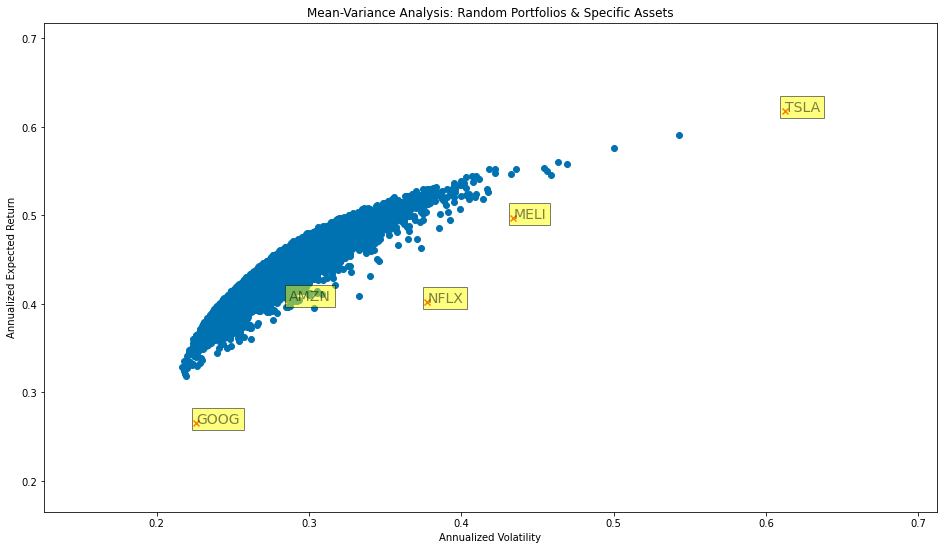

In [17]:
## más código de graficos.

## define el tamaño del gráfico
plt.figure(figsize=(16,9))

## hace el plot usando la matriz que tenía en una fila las medias y en otra fila los desvíos.
plt.plot(metrics[1,:], metrics[0,:], 'o') # recordar aquí que X-axis = risk, Y-axis = expected returns

## y aparte marca con una x roja los portfolios de 1 solo activo (o sea, las acciones que vimos más arriba)
plt.scatter(sd, mu, marker = 'x', color = 'r')

## itera para cada ticker y escribe los nombres de los tickers en un cartel amarillo
for i in range(len(tickers)):
    plt.text(x = sd[i], y = mu[i], s = tickers[i], 
             fontdict = dict(color = 'black', alpha = 0.5, size =14),
             bbox = dict(facecolor = 'yellow', alpha = 0.5))

## define el minimo y el máximo del gráfico para X y para Y
plt.xlim(sd.min() - 0.1, sd.max() + 0.1)
plt.ylim(mu.min() - 0.1, mu.max() + 0.1)

## agrega titulo y nombres a los ejes
plt.title('Mean-Variance Analysis: Random Portfolios & Specific Assets')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Expected Return')
    

plt.show()


#plt.text(df.G[df.Team==’LIV’],df.GA[df.Team==’LIV’],”LIV”, 
# fontdict=dict(color=’black’, alpha=0.5, size=16))

#### Camino a la frontera eficiente
Empezamos con el portafolio de MVG como punto de partida
\begin{equation}
\boldsymbol{x}^{\ast}\equiv\operatorname*{argmin}_{\boldsymbol{x}\in\mathcal{C}}\mathit{Var}\left( \boldsymbol{x}\right) \text{.}
\end{equation}

* Sujeto a estar invertidos 100%.

In [18]:
## arrancamos buscando el portfolio de minima varianza.
## la próxima línea pincha con la última versión de pandas. Hay que cambiar as_matrix a to_numpy o values

In [19]:
import cvxopt as opt

# minimize    (1/2)*x'*P*x + q'*x
#        subject to  G*x <= h
#                    A*x = b.

# Función objetivo cuadrática
#P = opt.matrix(covmat.as_matrix())

## es la matriz de varianzas y covarianzas pero con la estructura de datos que necesita cvxopt
## algunos paquetes tienen estructuras de datos propias para funcionar
## y no admiten usar arrays de numpy por ejemplo.
## este es un caso.
P = opt.matrix(covmat.values)
print(P)

[ 8.23e-02  3.88e-02  4.94e-02  6.34e-02  4.64e-02]
[ 3.88e-02  5.11e-02  3.85e-02  2.71e-02  3.74e-02]
[ 4.94e-02  3.85e-02  3.75e-01  5.18e-02  8.15e-02]
[ 6.34e-02  2.71e-02  5.18e-02  1.43e-01  5.35e-02]
[ 4.64e-02  3.74e-02  8.15e-02  5.35e-02  1.88e-01]



In [20]:
## Bueno, acá arranca la falopa. 
## Es medio una paja cvxopt porque tiene un formato como medio estricto
## tenes que escribir el problema como lo quiere él, porque sino le da ansiedad.

## el profe nos copio arriba:

# minimize    (1/2)*x'*P*x + q'*x
#        subject to  G*x <= h
#                    A*x = b.

## la primera linea fijate que tiene un término lineal al final (q'x) que no queremos.
## así que lo mata seteando q en 0

In [21]:
# función objetivo lineal
q = opt.matrix(np.zeros((len(mu),1)))
print(q)

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [22]:
## la segunda línea es una restricción de que los pesos sean todos positivos
## pero escrita de una forma medio incómoda:

# subject to  G*x <= h

## entonces ¿que hacemos? 
## definimos G como una matriz identidad pero negativa
## o sea, todos -1 en la diagonal
## cuando despejás x, premultiplicando por otra G a ambos lados

## si decís que h es un vector de 0 
## a cvxopt le queda que x >= 0
## o sea, que los pesos son positivos

## te queda:
##     G*x <= h
##     G*G*x <= G*h
##     I*x >= G*h
##     x >= G*h
##     (y como h = 0)
##     x >= 0


## En resumen, defino G como "- Identidad"
## h como un vector de 0
## y con eso le digo a cvxopt que los pesos tienen que ser positivos

In [23]:
##  defino una matriz con -1 en la diagonal
G = opt.matrix(-np.identity(len(mu)))
print(G)

[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]



In [24]:
## defino h como un vector de 0
h = opt.matrix(np.zeros((len(mu),1)))
print(h)
# G*x <= h, lease 'long only', cada activo debe tener una ponderación mayor o igual a cero

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [25]:
## vamos la última linea
#    A*x = b.

## los pesos tienen que sumar 1
## ¿Como escribo esto?
## si A es un vector de 1
## Hacés el producto punto de un vector de 1 contra los pesos
## es como sumar los pesos. 

## Entonces vos querés hacer la suma de los pesos y te tiene que dar 1
## si b = 1
## Entonces A*x = b  (esto es lo mismo que decir que Sum(x) = b )


In [26]:
## A es un vector de 1
A= opt.matrix(1.0,(1,len(mu)))
print(A)

[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00]



In [27]:
## b es un escalar = 1
b = opt.matrix(1.0)
print(b) 
# A * x = b, lease 'fully invested', la suma de ponderaciones tiene que ser 100%

[ 1.00e+00]



In [28]:
## AHora que tenemos esta muy amigable sintaxis ya armadita, podemos usar el optimizador.
## en este caso vamos a usar programación cuadrática

## solamente hay que pasarle a solver.qp cada una de las cositas que acabamos de desarrollar
## P es la matriz de varianzas y covarianzas
## q son los 0 para matar el término lineal
## G y h son los que te permiten que los pesos sean siempre > 0
## A y b son los que hacen que los pesos sumen 1

solution = opt.solvers.qp(P,q,G,h,A,b)

## el objeto solution tiene varias cosas adentro, sacamos "x" que son los pesos
mvg_pond = np.array(solution['x'])

## pasamos a dataframe
mvg_dataframe = pd.DataFrame(data = mvg_pond, index = tickers, columns = list(['Pond']))
print(mvg_dataframe)


     pcost       dcost       gap    pres   dres
 0:  3.3480e-02 -9.9450e-01  1e+00  2e-16  3e+00
 1:  3.2645e-02 -3.5059e-03  4e-02  1e-16  1e-01
 2:  2.4423e-02  1.6121e-02  8e-03  1e-16  2e-17
 3:  2.3307e-02  2.2548e-02  8e-04  2e-16  2e-17
 4:  2.3172e-02  2.3103e-02  7e-05  2e-17  9e-18
 5:  2.3165e-02  2.3161e-02  4e-06  1e-16  5e-18
 6:  2.3165e-02  2.3165e-02  7e-08  2e-18  1e-17
Optimal solution found.
          Pond
AMZN  0.091978
GOOG  0.733835
TSLA  0.010609
NFLX  0.126594
MELI  0.036984


In [29]:
## acá es como hicimos arriba, pero con otra sintaxis

## convirtió a matrix los retornos promedio y los pesos del portfolio de 
## minima varianza. Cuando usas la estructura de datos matrix, el producto es el producto de matrices
## diferente a cuando usas arrays
mvg_ret = np.asmatrix(mu) * np.asmatrix(mvg_pond)
## tmb podría escribirse: mu.dot(mvg_pond)
## o si no:  mu.values @  mvg_pond <-- @ es un producto de matrices para la estructura de array

## y acá calcula el desvío estandar del portfolio de minima varianza
## como arriba tambien. Pasa todo a matrix y hace la transpuesta de los pesos
## por la matriz de covarianza, por la matriz de pesos
mvg_std = np.sqrt(np.asmatrix(mvg_pond).T * np.asmatrix(covmat) * np.asmatrix(mvg_pond))

## se podría escribir también:
## np.sqrt(mvg_pond.T.dot(covmat.dot(mvg_pond)))

print("Retorno esperado del portafolio de MVG: "+"{:.2%}".format(mvg_ret.item(0)))
print("Desvío estándar del portafolio de MVG: "+"{:.2%}".format(mvg_std.item(0)))

Retorno esperado del portafolio de MVG: 30.75%
Desvío estándar del portafolio de MVG: 21.52%


##### Construyendo la frontera eficiente
Dado el "ancla" del portafolio de mínima varianza global (MVG), pasamos a construir toda la frontera eficiente vía dos caminos alternativos: 
* **maximizar retorno**, sujeto a un riesgo incremental (dado el punto de partida del riesgo del portafolio de MVG)
* **minimizar riesgo**, sujeto a un retorno incremental (dado el mismo punto de partida anterior).

Mantenemos las restricciones de estar 'fully invested' y 'long only'.

In [30]:
## aca lo que hace el profe es meter todo el código en partes que vimos hace un cachito
## en una sola funcion.
## esto tiene un montón de ventajas, como hacer el código más manejable y reutilizable

## y mete una modificación, porque acá lo que busca es el portfolio de minima varianza
## pero para un retorno dado


def optimizacion(mean_returns, cov_matrix, ret_tgt):
    opt.solvers.options['show_progress'] = False
    
    ## acá va a definir todo lo que definimos antes arriba:
    ## la matriz de covarianzas en el formato que precisamos
    #P = opt.matrix(cov_matrix.as_matrix())
    P = opt.matrix(cov_matrix.values)
    
    ## el vector de 0 para matar el término lineal
    q = opt.matrix(np.zeros((len(mean_returns),1)))
    
    
    ## G y h para asegurarnos de que los pesos sean positivos, pero *ojo*
    ## que no son iguales a los G y H de recién!
    
    ## fijate que acá G es la concatenación de dos cosas: 
    ## la primera fila de G va a ser el vector de retornos * -1
    ## y despues abajo va la matriz de -1 como antes 
    G = opt.matrix(np.concatenate((-np.transpose(np.expand_dims(np.array(mean_returns),axis = 1)), 
                               -np.identity(len(mean_returns))),0))
    
    ## y acá  h también lo cambia por una concatenación: es -1 * el retorno target 
    ## y abajo el h anterior.
    h = opt.matrix(np.concatenate((-np.ones((1,1))*ret_tgt,
                              np.zeros((len(mean_returns),1))),
                              0))
    
    ## ¿Que es esta magia negra?
    ## Bueno, pensalo como si tuvieras un sistema de inecuaciones y es más fácil
    ## Estás metiendo una restricción más nomás: 
    ## que los retornos por los pesos sean >= al retorno target
    
    ## a y b para que los pesos sumen 1
    A= opt.matrix(1.0,(1,len(mean_returns)))
    b = opt.matrix(1.0)
    
    ## y acá corre el optimizador
    sol = opt.solvers.qp(P,q,G,h,A,b)['x']
    return sol



In [31]:
## En los siguientes dos bloques lo que va a hacer es mostrar como se ven G y h
## pero no los va a usar porque ya están definidos adentro de la funcion!
## es solamente para ver que hay adentro:

In [32]:
# para que pueda apreciarse las restricciones de desigualdad
G = opt.matrix(np.concatenate((-np.transpose(np.expand_dims(np.array(mu),axis = 1)), 
                               -np.identity(len(mu))),0))
print(G)

[-4.04e-01 -2.65e-01 -6.18e-01 -4.02e-01 -4.97e-01]
[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]



In [33]:
# continua
h = opt.matrix(np.concatenate((-np.ones((1,1))*mvg_ret.item(0),
                              np.zeros((len(mu),1))),
                              0))
print(h)

[-3.08e-01]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [34]:
## acá hay otra función para calcular métricas de portfolios (o sea, media y desvío)

def portfolio_metrics2(weights, mean_returns, cov_matrix):
    
    ## convierte en array (no matrix) los retorno promedio y la matriz de covarianza
    mean_returns = np.array(mean_returns)
    cov_matrix = np.array(cov_matrix)
    
    ## calcula media y desvío
    ret = np.sum(mean_returns * weights) ## producto punto entre pesos y retornos
    
    ## el mismo calculo con los pesos y la matriz de covarianza que ya vimos más arriba
    std = np.asscalar(np.sqrt(np.dot(weights, np.dot(cov_matrix, weights.T)))) 
    return ret, std

In [35]:
## en el proximo bloque el profe define un retorno máximo y un retorno mínimo.
## el del máximo es el retorno máximo de un solo activo.
## el retorno mínimo es el del portfolio de minima varianza

## mvg_ret.item(0) <-- saca el valor de la matriz, porque no podés subsetearla tipo mvg_ret[0]

In [36]:
# vector de retornos target
max_ret = np.max(mu) # cota superior, el retorno "más grande" entre los activos individuales
min_ret = mvg_ret.item(0) # cota inferior, el retorno del portafolio de MVG, también bajo la lógica de 

## acá lo que va a hacer es tomar 100 retornos consecutivos entre el retorno minimo y el máximo.
## Onda, va moviendose de a puchito. Agarra el minimo, el minimo mas u 
# ser el portafolio de menor riesgo
n_port = 100 
r_tgts = np.linspace(min_ret, max_ret,n_port)

In [37]:
## ya casi estamos!
## lo que hace en el próximo bloque es ir iterando sobre cada retorno target (r_tgts)
## y hace la optimización para ese retorno target 
## (o sea, encuentra los pesos que le dan la varianza mas chica para ese retorno)

In [38]:
# Completamos el ejercicio
ponderaciones_list = []
metricas_list = np.zeros((2,n_port)) ## acá de vuelta usa una matriz de 0 para guardar los resultados
for i in range(len(r_tgts)):
    ponderacion = optimizacion(mu, covmat, r_tgts[i]) ## hace la optimización
    ponderacion = np.array(ponderacion).T  ##toma la transpuesta de los pesos 
    ponderaciones_list.append(ponderacion[0].tolist())  ## pasa los pesos a lista y los guarda 
    
    ## calcula media y desvio del portfolio y lo guarda
    port_mu, port_std = portfolio_metrics2(ponderacion, mu, covmat) 
    metricas_list[0,i] = port_mu
    metricas_list[1,i] = port_std

In [39]:
## lo que tenemos acá es, para cada retorno target, 
## la media y desvío del portfolio con menor varianza para ese retorno
print(pd.DataFrame(metricas_list))

         0         1         2         3         4         5         6   \
0  0.307744  0.310678  0.313809  0.316945  0.320080  0.323215  0.326351   
1  0.215243  0.215274  0.215367  0.215523  0.215741  0.216020  0.216362   

         7         8         9   ...        90        91       92        93  \
0  0.329486  0.332621  0.335757  ...  0.589719  0.592854  0.59599  0.599125   
1  0.216764  0.217228  0.217752  ...  0.509465  0.519804  0.53045  0.541385   

         94        95        96        97        98        99  
0  0.602260  0.605396  0.608531  0.611666  0.614802  0.617937  
1  0.552592  0.564055  0.575758  0.587687  0.599829  0.612171  

[2 rows x 100 columns]


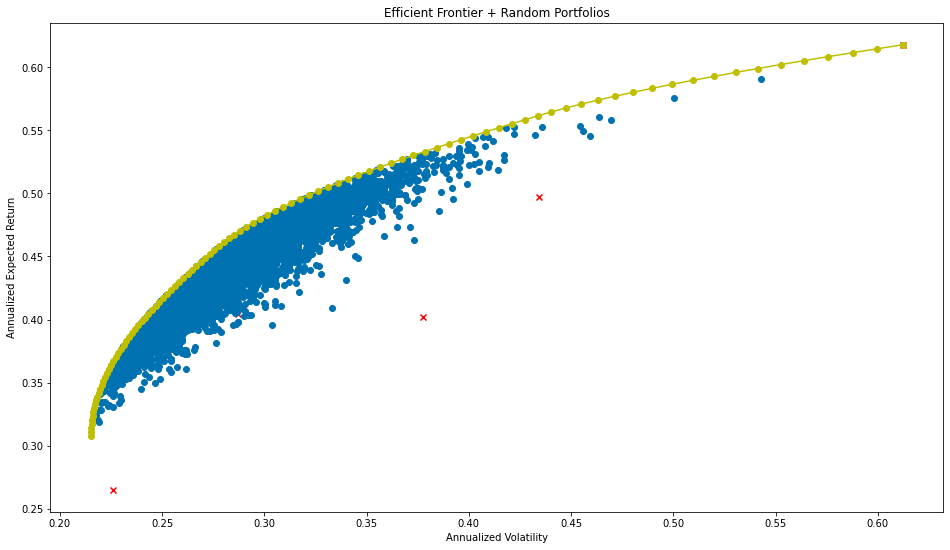

In [40]:
## y los plotea
plt.figure(figsize=(16,9))
## plotea los portfolios random que calculamos al principio de todo
plt.plot(metrics[1,:], metrics[0,:], 'o')

## y despues plotea con amarillo los portfolios óptimos que acabamos de calcular:
## la frontera eficiente
plt.plot(metricas_list[1,:], metricas_list[0,:], 'y-o')

## tambien plotea los activos individuales en rojo:
plt.scatter(sd, mu, marker = 'x', color = 'r')

## titulo, nombres de ejes y esas cosas:
plt.title('Efficient Frontier + Random Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Expected Return')
plt.show()

In [41]:
## en el próximo bloque el profe pone otra forma más amistosa de hacer el cálculo de la frontera eficiente,
## usando scipy

In [42]:
## ¿QUe vamos a hacer ahora? Encontrar el portfolio con mejor sharpe ratio.
## lo va a buscar usando scipy. Para eso va a minimizar el sharpe ratio negativo 
## porque scipy siempre minimiza y minimizar -x es como maximizar x

In [43]:
## import scipy
import scipy.optimize as sco
from scipy import stats


def get_ret_vol_sr(weights): 
    ## toma los pesos
    weights = np.array(weights)
    
    ## calcula retorno y desvio estandar del portfolio.
    ## esto es igual a como lo veniamos haciendo
    ret = np.sum(np.array(mu) * weights) 
    vol = np.sqrt(np.dot(weights.T,np.dot(np.array(covmat),weights)))
    
    ## acá define el sharpe ratio pero sin risk free asset (o sea, solo retorno/volatilidad)
    sr = ret/vol
    return np.array([ret,vol,sr])
  
    
## lo que va a hacer es minimizar el -sharpe ratio (porque scipy optimize es solo para minimizar!)
# minimize negative Sharpe Ratio
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

## esta es la forma que tiene scipy de poner las restricciones. 
## tenes que definir si es una igualdad o una desigualdad.
## Acá lo que vamos a hacer es decir que es una igualdad 
##(si le decimos a scipy que es una igualdad, 
## él considera que la funcion que le pasemos tiene que ser = 0)

## definimos una función para poner la restricción de que los pesos sumen 1
## por eso hacemos la suma de los pesos -1 (porque tiene que ser = 0 como dijimos recien)

# check allocation sums to 1
def check_sum(weights): 
    return np.sum(weights) - 1

## definimos la restricción:
# create constraint variable
cons = ({'type':'eq','fun':check_sum})

## ademas de que sumen 1, los pesos tienen que estar acotado entre 0 y 1:
## para eso usamos los "boundaries":

# create weight boundaries
## esto crea una tupla de tuplas. Genera una tupla (0,1) por cada elemento del vector mu
bounds = ((0,1),)*len(mu) 

## y le decimos a scipy donde arrancar a buscar. 
## En este caso: distribuyendo uniformemente los pesos entre los activos
# initial guess
init_guess = [1/len(mu)]*len(mu)

## corremos la rutina de minimización de scipy
opt_results = sco.minimize(neg_sharpe, init_guess, 
                           method='SLSQP', bounds=bounds, constraints=cons)


In [44]:
print(opt_results['x'])

[0.39119944 0.20817948 0.12288423 0.09915327 0.17858357]


In [45]:
## acá calcula cuanto le da media y desvío del portfolio con mejor sharpe

# Completamos el ejercicio
ponderacion_sr = np.array(opt_results['x']).T
port_mu, port_std = portfolio_metrics2(ponderacion_sr, mu, covmat)
print(port_mu)
print(port_std)

0.4179634493675367
0.2509261915406752


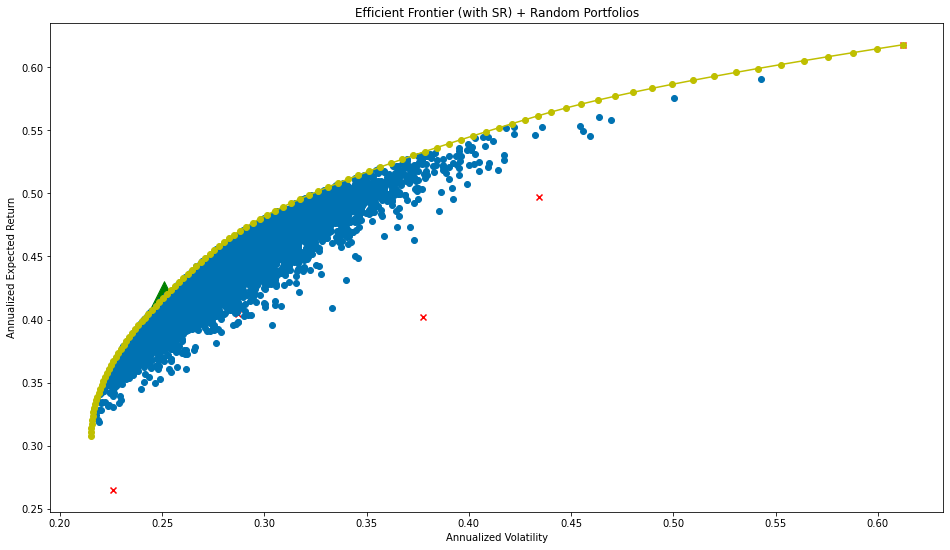

In [46]:
## y grafica: es casi el mismo código que antes
plt.figure(figsize=(16,9))
plt.plot(metrics[1,:], metrics[0,:], 'o')
plt.plot(metricas_list[1,:], metricas_list[0,:], 'y-o')
plt.scatter(sd, mu, marker = 'x', color = 'r')
plt.scatter(port_std, port_mu, marker = '^', color = 'g', alpha = 1,s = 1000)
plt.title('Efficient Frontier (with SR) + Random Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Expected Return')
plt.show()

## Bonus track de parte mía

Sirve la estrategia? ¿Como performa out of sample?
No soy de finanzas, así que lo evalúo como evaluaría cualquier otra cosa (seguro alguno de finanzas tiene alguna idea mejor!): contra un random.

In [47]:
## bajo la data hasta el 1/1/2021
## voy a ajustar sobre esto:
tickers = ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI']
prices = pdr.get_data_yahoo(tickers, start = '2015-01-01', end='2021-01-01')['Adj Close']
monthly_prices = prices.asfreq(freq='BM').ffill()
mu = expected_returns.mean_historical_return(monthly_prices,frequency = 12, compounding = False) 
covmat = risk_models.sample_cov(monthly_prices, frequency = 12)

In [48]:
## import scipy
import scipy.optimize as sco
from scipy import stats



def get_ret_vol_sr(weights): 

    weights = np.array(weights)
    ret = np.sum(np.array(mu) * weights) 
    vol = np.sqrt(np.dot(weights.T,np.dot(np.array(covmat),weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])
  
    
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1


def check_sum(weights): 
    return np.sum(weights) - 1

cons = ({'type':'eq','fun':check_sum})

bounds = ((0,1),)*len(mu) 

init_guess = [1/len(mu)]*len(mu)

opt_results = sco.minimize(neg_sharpe, init_guess, 
                           method='SLSQP', bounds=bounds, constraints=cons)

In [49]:
ponderacion_sr = np.array(opt_results['x']).T

In [50]:
## esto es lo que debería comprar
ponderacion_sr

array([0.50283832, 0.        , 0.14457291, 0.11101222, 0.24157655])

ok, ya tengo los pesos ¿como performó en Q1 de este año?

In [51]:
## bajo los precioos entre 2021-01-01 y 2021-03-31
tickers = ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI']
prices = pdr.get_data_yahoo(tickers, start = '2021-01-01', end='2021-03-31')['Adj Close']
monthly_prices = prices.asfreq(freq='BM').ffill()


In [52]:
## escribo funcion que toma pesos y precios mensuales y calcula la dif % entre el primero y el ultimo
def calcular_resultado(weight, monthly_prices):
    inicio = weight.dot(monthly_prices.iloc[0,:])
    fin = weight.dot(monthly_prices.iloc[-1,:])
    resultado= (fin-inicio)/inicio * 100
    return resultado

In [53]:
## anduvo así:
resultado_q1 = calcular_resultado(ponderacion_sr, monthly_prices)
print(resultado_q1)

-6.768365540811752


In [54]:
## y los portfolios random? ya los teniamos calculados:
random_resultados = []
for portfolio_random in weights_matrix:
    random_resultados.append(calcular_resultado(portfolio_random, monthly_prices))

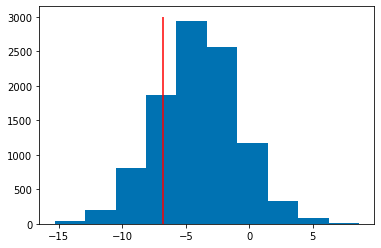

In [55]:
## Hago un histograma de los resultados random
plt.hist(random_resultados)

## para este Q no anduvo muy bien que digamos:
## y la estrategia no parece ser mejor que un random
plt.vlines(x = resultado_q1, ymin=0, ymax=3000, color="red")